In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
from IPython.display import display
import os

# Displaying Our Images

These are raw, uncompressed rasters

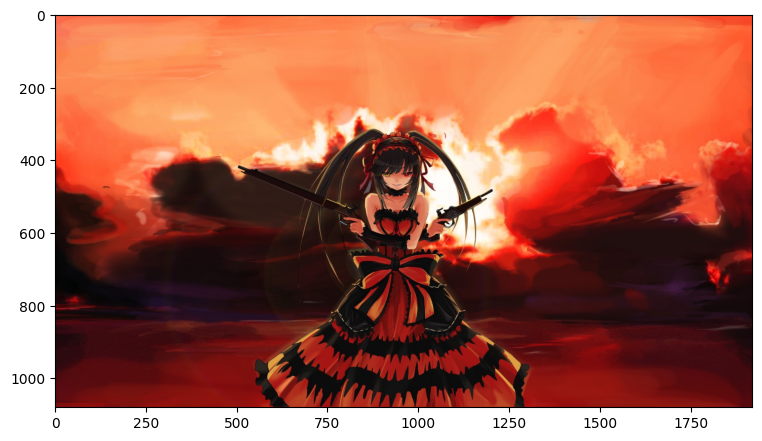

(1080, 1920, 3)


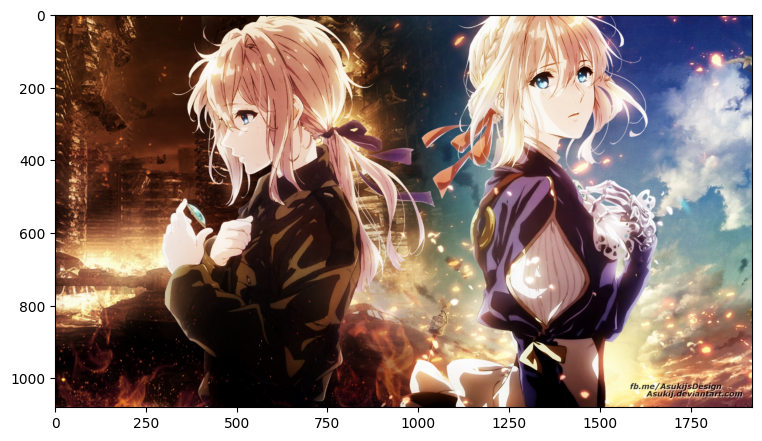

(1080, 1920, 3)


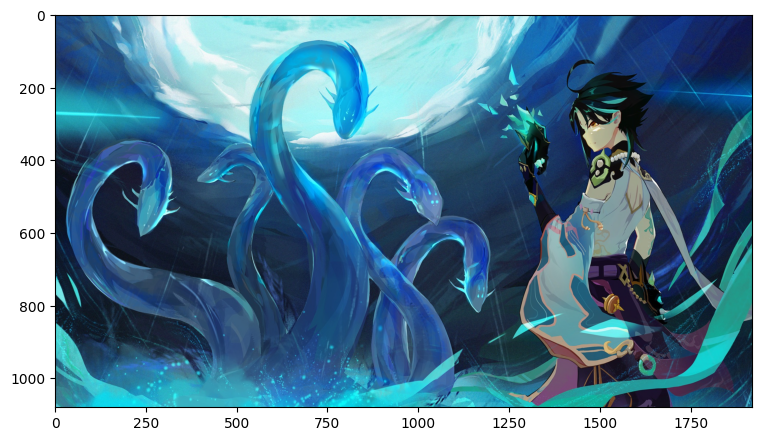

(1080, 1920, 3)


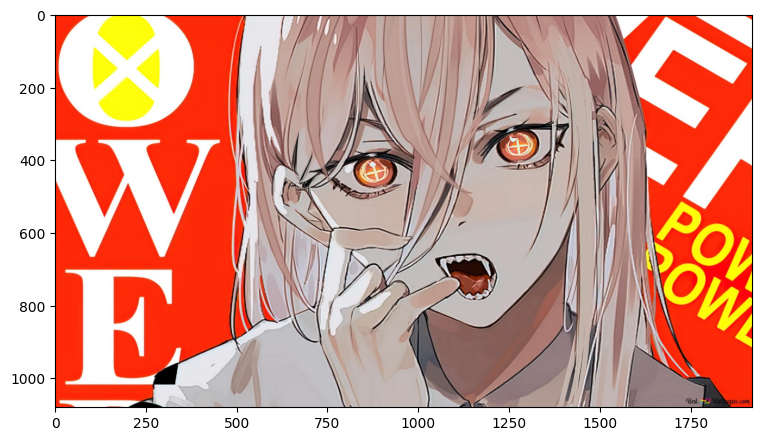

(1080, 1920, 3)


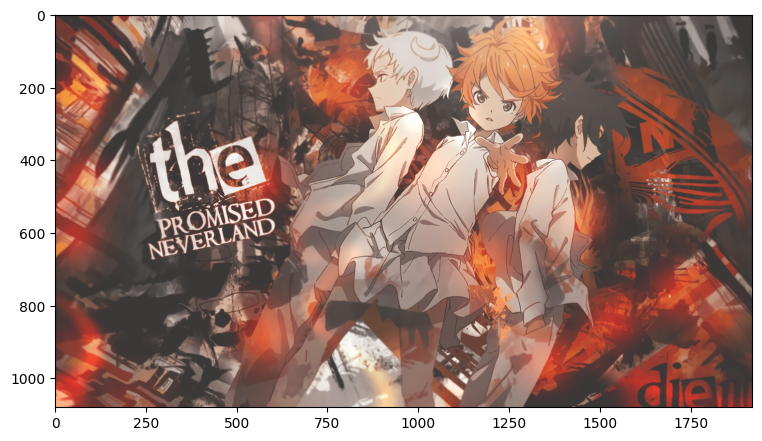

(1080, 1920, 3)


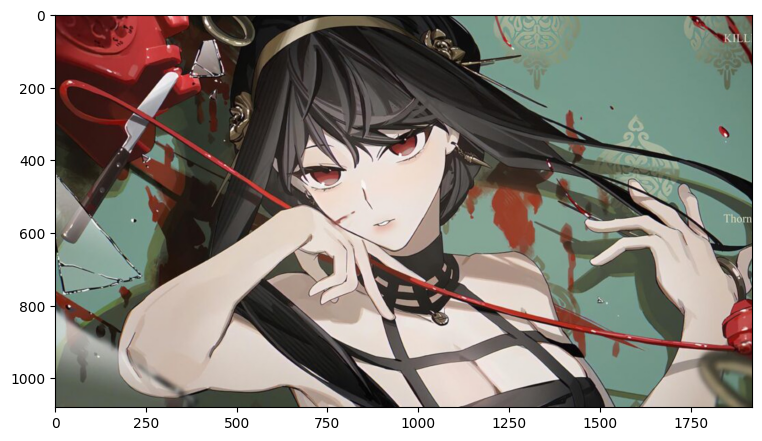

(1080, 1920, 3)


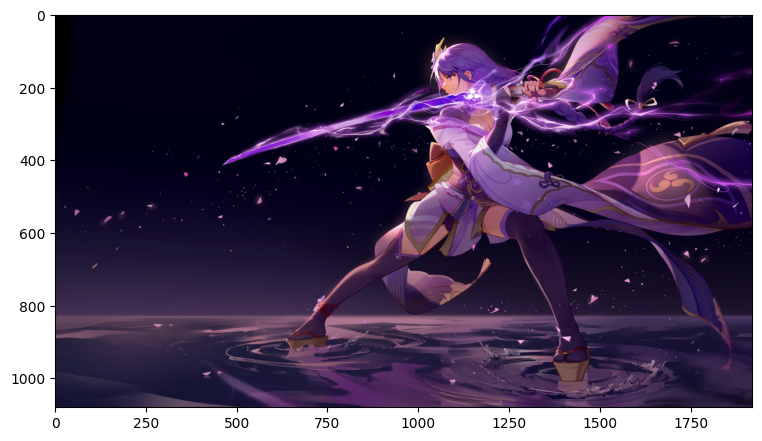

(1080, 1920, 3)
Total size of images: 174.1824 MB


In [18]:
imgs = []
nbytes = 0

for i, path in enumerate(glob.glob("imgs/*")):
    np_arr = np.load(path)
    imgs.append(np_arr)
    
    nbytes += np_arr.size * np_arr.itemsize
    
    plt.rcParams["figure.figsize"] = (9,16)
    plt.imshow(np_arr)
    plt.show()
    print(np_arr.shape)
    

print(f"Total size of images: {nbytes / 1000000} MB")

In [19]:
orig_shape = imgs[0].shape
for i in range(len(imgs)):
    imgs[i] = imgs[i].reshape(-1, 3)


# Computing PCA

This cell below computes the PCA matrix and reduces the dimensionality of the input images. Below you'll see the 7 images displayed in compressed form. Notice how it seems to look like all 7 images mashed together.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2073600, 21)
(21, 21)
(21, 11)
-2.603259 2.3523388
(2073600, 11)


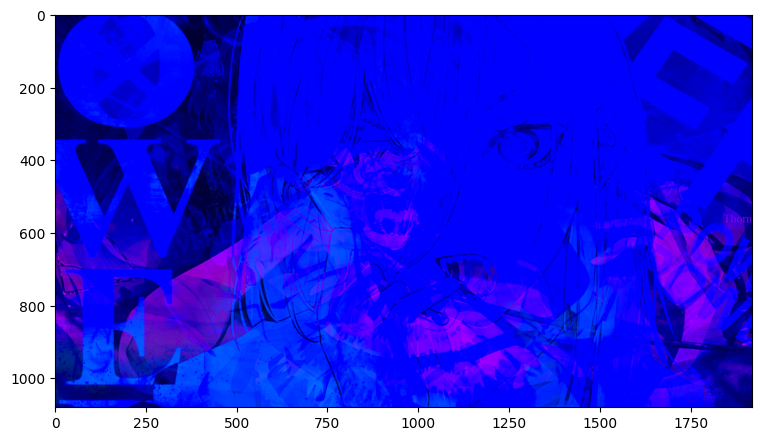

Size of compressed array: 91.2384 MB


In [24]:
X = np.concatenate(imgs, axis=-1)
print(X.shape)
X_norm = X - np.mean(X, axis=0, keepdims=True)


cov = np.dot(X_norm.T, X_norm)
print(cov.shape)

U, S, V = np.linalg.svd(cov)

keep = np.cumsum(S)/np.sum(S)
keep_idx = len(keep)-1
for i in range(len(keep)):
    if keep[i] > 0.97:
        keep_idx = i
        break
        
Z = U[:, :keep_idx + 1]
print(Z.shape)


res = np.dot(Z.T, X.T).T
print(np.amin(res), np.amax(res))
print(res.shape)

plt.rcParams["figure.figsize"] = (9,16)
plt.imshow(res[:, 0:3].reshape(orig_shape))
plt.show()

print(f"Size of compressed array: {res.size * res.itemsize / 1000000} MB")


# Reconstructing the Original Images

The dimensionally-reduced dataset can be transformed back to the original shape, and amazingly we are able to recover each image individually from the "mush" above. Note that some of the color information has been lost, as evident from the faded colors compared to the original

In [22]:
recon = np.dot(Z, res.T).T
print(recon.shape)

(2073600, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


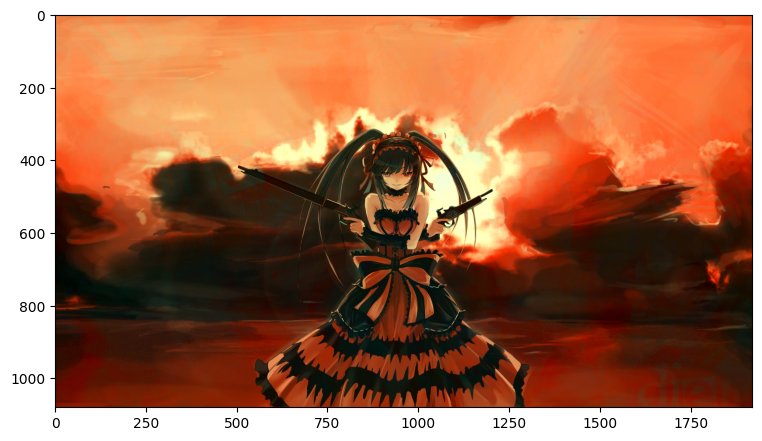

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


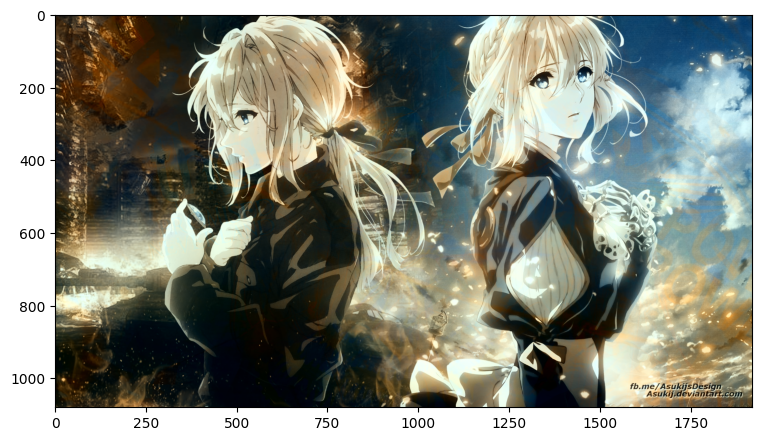

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


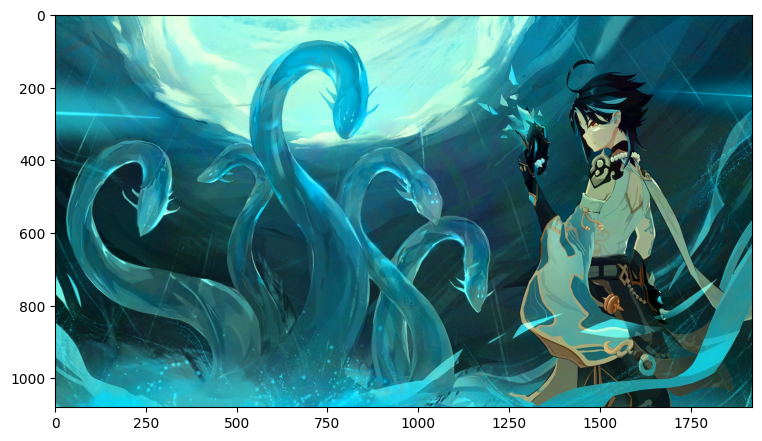

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


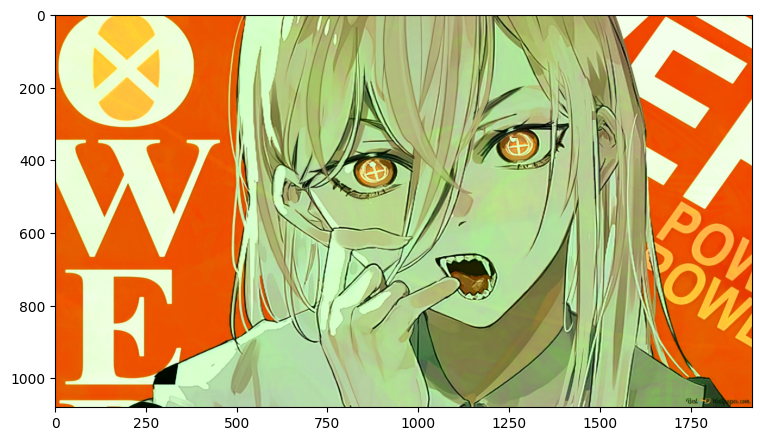

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


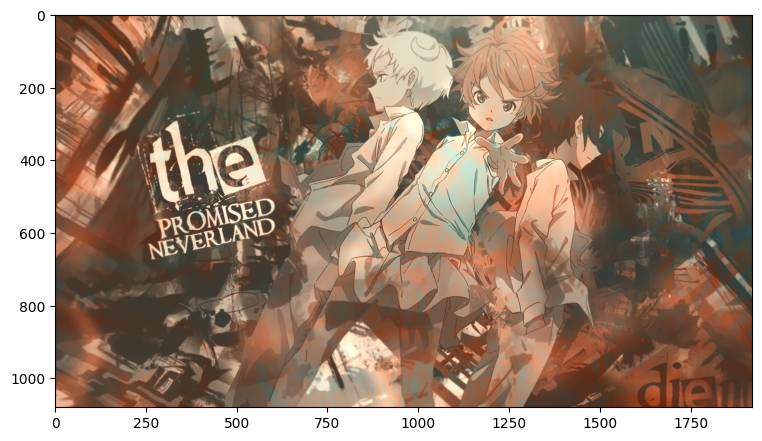

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


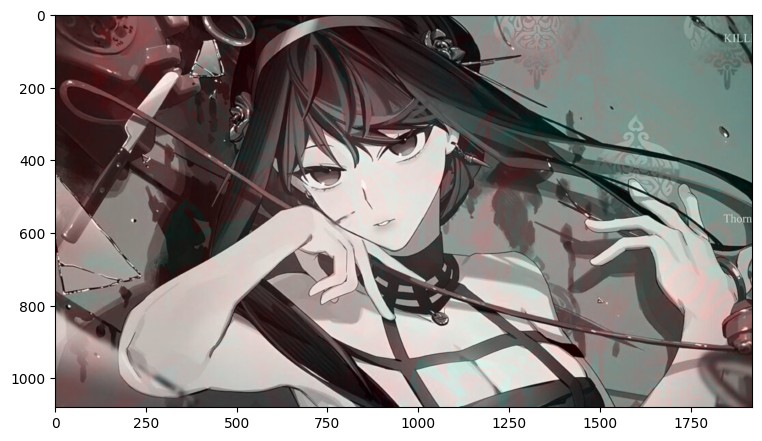

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


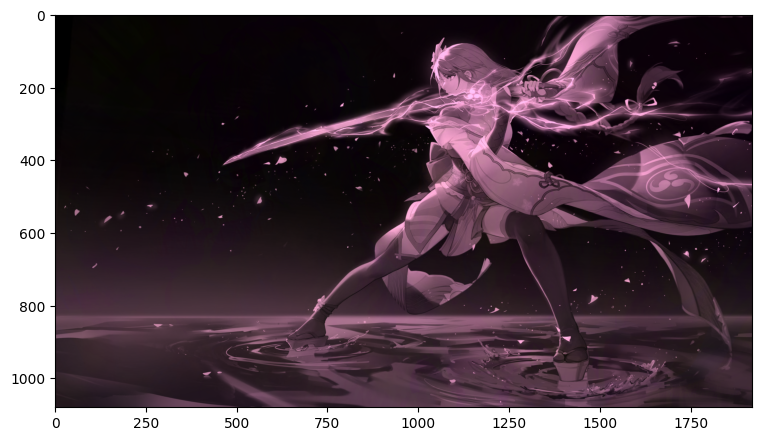

In [23]:
for i in range(recon.shape[1] // 3):
    img = recon[:, i*3: (i+1)*3].reshape(orig_shape)
    plt.rcParams["figure.figsize"] = (9,16)
    plt.imshow(img)
    plt.show()